In [1]:
# Now try to plot the reaches
import numpy as np
import random
from matplotlib import pyplot as plt
import scipy.io


In [2]:
# Row 1 is X position,  Row 2 is Y position
j1 = np.loadtxt('./jsPos1', delimiter= ',')
j2 = np.loadtxt('./jsPos2', delimiter= ',')

In [4]:
j1.shape

(2, 2325146)

In [5]:
j2.shape

(2, 2006968)

In [6]:
j1[1].shape

(2325146,)

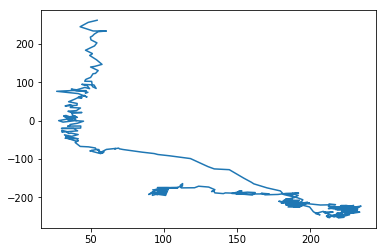

In [11]:
plt.plot(j1[0][0:500], j1[1][0:500])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

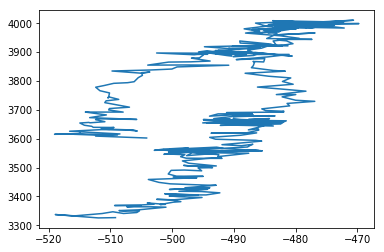

In [12]:
plt.plot(j2[0][0:500], j2[1][0:500])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [56]:
r1 = np.loadtxt('./reachStart1', delimiter= ',')
r2 = np.loadtxt('./reachStart2', delimiter= ',')

In [14]:
r1.shape

(164,)

In [15]:
r2.shape

(170,)

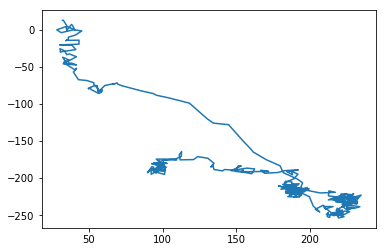

In [18]:
# plot an individual reach
plt.plot(j1[0][0:int(r1[0])], j1[1][0:int(r1[0])])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

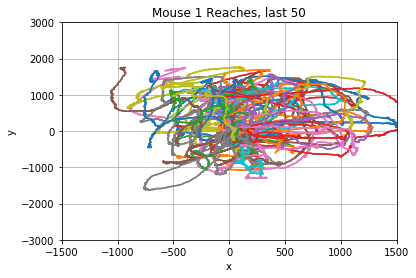

In [63]:
# plot an individual reach
for i in range(114,164):
    plt.plot(j1[0][int(r1[i]-500):int(r1[i]+1000)], j1[1][int(r1[i]-500):int(r1[i]+1000)])
plt.title("Mouse 1 Reaches, last 50")
plt.xlim([-1500,1500])
plt.ylim([-3000,3000])
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

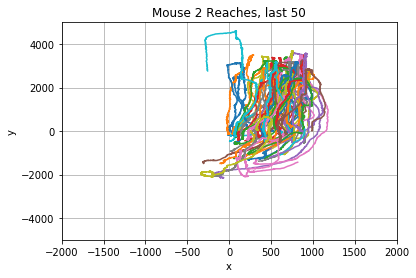

In [64]:
# plot an individual reach
for i in range(120,170):
    plt.plot(j2[0][int(r2[i]-500):int(r2[i]+1000)], j2[1][int(r2[i]-500):int(r2[i]+1000)])
plt.title("Mouse 2 Reaches, last 50")
plt.xlim([-2000,2000])
plt.ylim([-5000,5000])
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
# Now you can process this in a principled way:
# take the peak values from the other stuff 
# then find the quadrant of that value at that peak
# last, classify each reach based on quadrant.

In [3]:
# Import file that has the euclidian distances and times of each reach
reaches1 = scipy.io.loadmat('./dat1.mat', squeeze_me=True)
reaches2 = scipy.io.loadmat('./dat2.mat', squeeze_me=True)

In [34]:
type(reaches1)
reaches1.keys()

['datStruct', '__version__', '__header__', 'goodNeurons', '__globals__']

In [4]:
reach1=reaches1['datStruct']
reach2=reaches2['datStruct']

In [27]:
x = reach1[5][6][0][0]
x

200.31999999999999

In [23]:
ampVel1 = np.loadtxt('./ampVel1', delimiter= ',')
ampVel2 = np.loadtxt('./ampVel2', delimiter= ',')

In [24]:
print ampVel1.shape
print ampVel2.shape

(163, 2)
(170, 2)


In [48]:
#datStruct is a structure with each entry corresponding to a different reach
# 	datStruct.amp: maximum amplitude for that reach
# 	datStruct.vel: maximum velocity for that reach
# 	datStruct.reaches
# 	datStruct.t
# 	datStruct.reachTime
# 	datStruct.reachIdx
# 	datStruct.jsPos
# 	datStruct.neuralDat
reach1[1]

(1678.4, 9.2204, array([ 397.  ,  396.79,  396.74, ...,  930.33,  930.07,  930.28]), array([-499, -498, -497, ...,  998,  999, 1000], dtype=int16), 12585, array([12086, 12087, 12088, ..., 13583, 13584, 13585], dtype=uint16), array([[  295.21,   296.03,   288.84, ...,  -404.81,  -396.83,  -406.85],
       [ -523.82,  -524.8 ,  -527.04, ...,  1061.9 ,  1055.6 ,  1054.1 ]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [67]:
reach1[2][6]

array([[  152.31,   151.29,   153.45, ..., -1140.5 , -1141.1 , -1135.4 ],
       [-1040.6 , -1033.4 , -1037.1 , ...,  1790.8 ,  1792.9 ,  1793.7 ]])

In [69]:
reach1[8][6][0][1]

132.02000000000001

In [5]:
# first process dataset 1

num_neurons = len(reach1)
quadrant1 = np.empty([num_neurons], dtype=int)

In [6]:
quadrant1.shape

(163,)

In [7]:
# for each neuron in dataset 1, find the quadrant.
for neuron in range(num_neurons):
    # find indices at which ampVel crosses the row
    indices = np.where(reach1[neuron][2] >= reach1[neuron][0])[0]
    #print indices
    # take the first index 
    # find what quadrant it is in.
    x = reach1[neuron][6][0][indices[0]]
    y = reach1[neuron][6][1][indices[0]]
    if x < 0:
        if y <0:
            quadrant1[neuron] = 2
        else:
            quadrant1[neuron] = 1
    else:
        if y <0:
            quadrant1[neuron] = 3
        else:
            quadrant1[neuron] = 0
            

In [8]:
quadrant1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 3, 1, 3, 3, 3, 1, 3, 3, 0, 3, 0, 1, 0, 3, 3, 3,
       2, 3, 3, 3, 1, 1, 1, 0, 2, 3, 3, 1, 3, 1, 3, 0, 0, 0, 1, 3, 3, 1, 1,
       1, 3, 0, 1, 1, 0, 0, 0, 3, 0, 2, 3, 3, 0, 3, 0, 3, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 3, 3, 0, 0, 0, 1, 1, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       3, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 3, 1, 0, 1, 3, 0, 2, 3,
       2, 1])

In [9]:
# first process dataset 1
num_neurons = len(reach2)
quadrant2 = np.empty([num_neurons], dtype=int)

In [10]:
# for each neuron in dataset 1, find the quadrant.
for neuron in range(num_neurons):
    # find indices at which ampVel crosses the row
    indices = np.where(reach2[neuron][2] >= reach2[neuron][0])[0]
    #print indices
    # take the first index 
    # find what quadrant it is in.
    x = reach2[neuron][6][0][indices[0]]
    y = reach2[neuron][6][1][indices[0]]
    if x < 0:
        if y <0:
            quadrant2[neuron] = 2
        else:
            quadrant2[neuron] = 1
    else:
        if y <0:
            quadrant2[neuron] = 3
        else:
            quadrant2[neuron] = 0

In [44]:
quadrant2.shape

(170,)

In [86]:
np.savetxt('quadrant1.txt', quadrant1, delimiter=',', fmt='%i')
np.savetxt('quadrant2.txt', quadrant2, delimiter=',', fmt='%i')

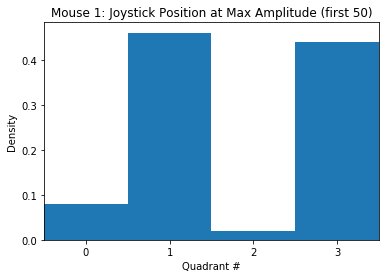

In [54]:
#plt.hist(quadrant1, bins=np.arange(quadrant1.min(), quadrant1.max()+1)-0.5)
def bins_labels(bins, **kwargs):
    bin_w = 1
    plt.xticks(np.arange(0.5, max(bins)-bin_w/2, bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
plt.hist(quadrant1[0:50], bins, density=True)
bins=range(5)
bins_labels(bins, fontsize=10)
plt.title("Mouse 1: Joystick Position at Max Amplitude (first 50)")
plt.xlabel("Quadrant #")
plt.ylabel("Density")
plt.show()

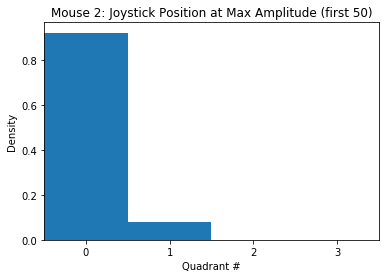

In [53]:
#plt.hist(quadrant1, bins=np.arange(quadrant1.min(), quadrant1.max()+1)-0.5)

bins=range(5)
bins_labels(bins, fontsize=10)
plt.hist(quadrant2[0:50], bins, density=True)
plt.title("Mouse 2: Joystick Position at Max Amplitude (first 50)")
plt.xlabel("Quadrant #")
plt.ylabel("Density")
plt.show()

In [7]:
reach1=reaches1['datStruct']
reach2=reaches2['datStruct']


In [50]:
ran = reach1[20][7]
ran.shape

(255, 1500)

In [58]:
sum_per_neuron = np.zeros(len(reach1[20][7])) #max num spikes per neuron initialized at zero
for i in range(num_neurons1): # for each reach
    spike= reach1[i][7]
    sums = np.sum(spike, axis=1)
    for j in range(len(spike)): # for each neuron
        sum_per_neuron[j] = max(sum_per_neuron[j], sums[j])


In [59]:
sum_per_neuron

array([ 10.,   7.,  39.,   2.,  36.,  14.,   4.,  30.,   2.,   1.,   3.,
         2.,   2.,   2.,   7.,   1.,  57.,   1.,   5.,   1.,   4.,   2.,
        14.,   2.,  15.,   2.,   2.,   2.,   3.,   8.,  11.,   3.,  11.,
         4.,   1.,   2.,   2.,  16.,   2.,   3.,   2.,   8.,   4.,  32.,
         7.,   1.,  29.,   1.,   2.,  47.,   4.,   2.,   5.,   8.,   2.,
         2.,  11.,   6.,   4.,   3.,   1.,  23.,   4.,   8.,   1.,   3.,
         2.,  13.,   2.,   2.,   2.,   2.,   1.,   2.,  21.,   5.,   2.,
        21.,  33.,  11.,   3.,   4.,   3.,   2.,  10.,   3.,  22.,   1.,
         5.,   5.,   5.,   3.,   4.,  10.,   8.,   5.,   1.,   9.,  22.,
         9.,   2.,  16.,   5.,  29.,   2.,   2.,   2.,   2.,  29.,   3.,
         4.,   3.,   2.,   2.,  42.,  68.,  32.,   2.,   2.,   1.,   2.,
         2.,   8.,   5.,  83.,   1.,   3.,  28.,   4.,   3.,   1.,   2.,
         1.,   9.,   1.,   3.,  11.,  11.,   8.,  15.,  11.,  41.,  19.,
        14.,   5.,   1.,  11.,   3.,  10.,  15.,  1

In [60]:
np.savetxt('spikes1.txt', sum_per_neuron, delimiter=',', fmt='%i')

In [61]:
sum_per_neuron = np.zeros(len(reach2[20][7])) #max num spikes per neuron initialized at zero
for i in range(num_neurons2): # for each reach
    spike= reach2[i][7]
    sums = np.sum(spike, axis=1)
    for j in range(len(spike)): # for each neuron
        sum_per_neuron[j] = max(sum_per_neuron[j], sums[j])

In [62]:
sum_per_neuron

array([ 15.,  11.,   7.,  12.,   1.,  17.,  22.,   3.,   5.,  10.,  16.,
        16.,  11.,  26.,  21.,  11.,   4.,  17.,  17.,  12.,   6.,  18.,
        15.,  11.,  14.,   3.,   4.,   2.,  16.,  10.,   8.,   1.,  14.,
        16.,   5.,  15.,  10.,  25.,  10.,  19.,   4.,   4.,  28.,   3.,
         6.,   5.,  31.,   2.,  19.,   5.,   2.,   6.,  13.,   8.,  22.,
         3.,   8.,  11.,   8.,   5.,  12.,  21.,  10.,   2.,  12.,   8.,
         5.,   7.,   2.,  19.,   5.,  10.,  27.,   3.,   8.,   9.,   4.,
         7.,   2.,  17.,   2.,   0.,  15.,   8.,   9.,   8.,   0.,   2.,
         4.,  16.,  21.,   5.,   6.,   7.,   8.,   1.,   8.,  15.,   2.,
         7.,   2.,   1.,   3.,   9.,   0.,  19.,  18.,  18.,  11.,   5.,
         5.,   4.,   4.,   5.,   4.,   8.,  16.,   8.,  11.,   5.,   9.,
         6.,   3.,   8.,  10.,   1.,   7.,   4.,  11.,   9.,   7.,   7.,
        33.,   3.,   6.,  13.,  12.,   8.,   2.,  34.,   1.,  17.,   4.,
        27.,   4.,   3.,  12.,  14.,   4.,   5.,   

In [63]:
np.savetxt('spikes2.txt', sum_per_neuron, delimiter=',', fmt='%i')

In [40]:
max_spikes2 = np.empty([num_neurons2])
for i in range(num_neurons2):
    spike2= reach2[i][7]
    sums = np.sum(spike2, axis=1)
    max_spikes2[i] = max(sums)

In [42]:
max_spikes2

array([ 57.,  38.,  54.,  27.,  23.,  25.,  27.,  30.,  29.,  27.,  25.,
        26.,  32.,  26.,  23.,  33.,  35.,  30.,  28.,  27.,  32.,  33.,
        36.,  38.,  39.,  37.,  44.,  45.,  34.,  34.,  45.,  54.,  43.,
        66.,  48.,  37.,  36.,  55.,  38.,  42.,  57.,  52.,  37.,  46.,
        45.,  46.,  47.,  56.,  41.,  49.,  62.,  56.,  49.,  64.,  58.,
        66.,  51.,  58.,  53.,  47.,  57.,  50.,  46.,  49.,  48.,  52.,
        52.,  49.,  64.,  58.,  54.,  45.,  65.,  55.,  61.,  55.,  59.,
        51.,  62.,  64.,  60.,  64.,  70.,  71.,  58.,  60.,  66.,  68.,
        69.,  67.,  73.,  65.,  61.,  64.,  63.,  57.,  70.,  67.,  64.,
        71.,  68.,  53.,  72.,  76.,  64.,  56.,  78.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  1

In [44]:
type1=np.loadtxt('./type1.txt', delimiter= ',')
# type2=reaches2['datStruct']
# j1 = np.loadtxt('./jsPos1', delimiter= ',')
# j2 = np.loadtxt('./jsPos2', delimiter= ',')

In [45]:
len(type1)

255

In [82]:
rew1.shape

(217,)

In [85]:
max(rew1)

2244700.0

In [83]:
reach = np.loadtxt('./reaches1', delimiter= ',')

In [84]:
reach.shape

(163, 1500)